In [1]:
%run "../../../common/0_notebooks_base_setup.py"   

/media/paulati/Nuevo vol/paula/dh/2021/dsad_2021_paula/common
default checking
Running command `conda list`... ok
jupyterlab=2.2.6 already installed
pandas=1.1.5 already installed
bokeh=2.2.3 already installed
seaborn=0.11.0 already installed
matplotlib=3.3.2 already installed
ipywidgets=7.5.1 already installed
pytest=6.2.1 already installed
chardet=4.0.0 already installed
psutil=5.7.2 already installed
scipy=1.5.2 already installed
statsmodels=0.12.1 already installed
scikit-learn=0.23.2 already installed
xlrd=2.0.1 already installed
Running command `conda install --yes nltk=3.5.0`... ok
Solving environment: ...working... done

# All requested packages already installed.


unidecode=1.1.1 already installed
pydotplus=2.0.2 already installed
pandas-datareader=0.9.0 already installed
flask=1.1.2 already installed


---

<img src='../../../common/logo_DH.png' align='left' width=35%/>


En la práctica de la clase de hoy usaremos un dataset de Kaggle que tiene datos de ventas:

https://www.kaggle.com/kyanyoga/sample-sales-data

Ustedes tienen un subconjunto de los datos disponibles, que usaremos para resolver ejercicios de Numpy, Estadística y Probabilidad.

## Ejercicio 1
Leer los datos del archivo /M1/CLASE_03/Data/sales_data_sample_excercise.csv

Este archivo tiene algunos datos numéricos y otros de tipo cadena de caracteres. 

Las columnas son:

* ORDERNUMBER: int, id de la orden

* SALES: float, monto abonado

* MONTH_ID: int, mes

* YEAR_ID: int, año

* PRODUCTLINE: str, producto

* COUNTRY: str, país de venta

¿Recuerdan que todos los elementos de una instancia de ndarray deben ser del mismo tipo? Entonces vamos a leer el archivo y crear una instancia de ndarray de tipo cadena de caracteres.

¿Qué pasaría si intentáramos crear una instancia de tipo int? ¿Y de tipo float?


In [4]:
## [BORRAR_PRESENCIAL]

import numpy as np
import seaborn as sns

# local:
data_location = '../Data/sales_data_sample_excercise.csv'

data= np.genfromtxt(data_location, delimiter='\t', skip_header=1,dtype=str)
data

array([['10107', '2871', '2', '2003', 'Motorcycles', 'USA'],
       ['10121', '2765.9', '5', '2003', 'Motorcycles', 'France'],
       ['10134', '3884.34', '7', '2003', 'Motorcycles', 'France'],
       ...,
       ['10386', '5417.57', '3', '2005', 'Ships', 'Spain'],
       ['10397', '2116.16', '3', '2005', 'Ships', 'France'],
       ['10414', '3079.44', '5', '2005', 'Ships', 'USA']], dtype='<U16')

In [7]:
data_float= np.genfromtxt(data_location, delimiter='\t', skip_header=1,dtype=float)
data_float

array([[1.01070e+04, 2.87100e+03, 2.00000e+00, 2.00300e+03,         nan,
                nan],
       [1.01210e+04, 2.76590e+03, 5.00000e+00, 2.00300e+03,         nan,
                nan],
       [1.01340e+04, 3.88434e+03, 7.00000e+00, 2.00300e+03,         nan,
                nan],
       ...,
       [1.03860e+04, 5.41757e+03, 3.00000e+00, 2.00500e+03,         nan,
                nan],
       [1.03970e+04, 2.11616e+03, 3.00000e+00, 2.00500e+03,         nan,
                nan],
       [1.04140e+04, 3.07944e+03, 5.00000e+00, 2.00500e+03,         nan,
                nan]])

array([[1.01070e+04, 2.87100e+03, 2.00000e+00, 2.00300e+03,         nan,
                nan],
       [1.01210e+04, 2.76590e+03, 5.00000e+00, 2.00300e+03,         nan,
                nan],
       [1.01340e+04, 3.88434e+03, 7.00000e+00, 2.00300e+03,         nan,
                nan],
       ...,
       [1.03860e+04, 5.41757e+03, 3.00000e+00, 2.00500e+03,         nan,
                nan],
       [1.03970e+04, 2.11616e+03, 3.00000e+00, 2.00500e+03,         nan,
                nan],
       [1.04140e+04, 3.07944e+03, 5.00000e+00, 2.00500e+03,         nan,
                nan]])

## Ejercicio 2

Ahora queremos simular datos que representen las precios de ventas de USA en el mismo período, usando una distribución normal.

¿Qué parámetros tiene esa distribución?

Generar 100 datos simulados.

In [10]:
sales_array = data_float[:,1]
sales_array


array([2871.  , 2765.9 , 3884.34, ..., 5417.57, 2116.16, 3079.44])

In [14]:
usa_mask= data[:,-1] == 'USA'
sales_usa= sales_array[usa_mask]

In [15]:
media_usa= np.mean(sales_usa)
std_usa = np.std(sales_usa)

In [16]:
random_generator= np.random.default_rng()
random_normal= random_generator.normal(loc=media_usa,scale=std_usa,size=100)
random_normal

array([3956.11935625, 5993.97899001, -782.56191742, 4439.97031321,
       4511.8086587 , 8177.7699412 , 3500.22269677,  192.88900464,
       4383.27152086, 2980.50277811, 3259.74839077, 3328.16353268,
       2786.75170516, 2454.26650605, 4114.40244963,  681.54526181,
       3221.29775481, 4273.40176199, 5289.12068912, 2820.37768446,
       3574.43438834, 1441.00900929, 3572.19333678, 3815.27469769,
       2450.48312313, 3329.22715819, 4533.81473979, 1590.70972876,
       3070.71429815, 3404.81847706, 4912.33421124, 3374.27714546,
        880.43109318, -291.20414294, 5237.35846381, 5158.87608918,
       5012.53050782, 1269.46858101, 4986.10350911, 4829.05443121,
        -52.66872344, 4719.16683447, 4709.2119399 , 5249.60147165,
       2531.59361557, 5488.57773173, 2488.25948903, 4581.03117786,
       6269.69519353, 3482.50947906, 4953.40277572, 4721.74267155,
       4848.24241768, 4251.94991984, 5753.13321559, 2530.6349534 ,
       1836.4466915 , 1729.82612961, 3273.78195321, 3491.81226

## Ejercicio 3

Agregando a los datos originales los datos simulados en el punto anterior, calcular: 
* Media
* Mediana
* Rango
* Desvío estandard

Y comparar con el conjunto sin datos simulados

Ayuda: https://docs.scipy.org/doc/numpy/reference/generated/numpy.concatenate.html

In [30]:
normal_and_original= np.concatenate([sales_usa,random_normal])
print(f'Mean:{np.mean(usa_and_original)}')
print(f'Std: {np.std(usa_and_original)}')
print(f'Median: {np.median(usa_and_original)}')
print(f'Range: {np.max(usa_and_original)-np.min(usa_and_original)}')


Mean:3612.033507756039
Std: 1868.7617680498302
Median: 3259.8341953872596
Range: 14865.361917415437


In [21]:
print(media_usa)
print(std_usa)
print(np.median(sales_usa))
print(np.max(sales_usa)-np.min(sales_usa))


3613.5287151394423
1879.9971929724536
3236.06
13541.66


## Ejercicio 4

Ahora queremos simular datos que representen las precios de ventas de USA en el mismo período, usando una distribución uniforme.

¿Qué parámetros tiene esa distribución?

Generar 100 datos simulados.

In [23]:
random_uniform= random_generator.uniform(low=np.min(sales_usa),high=np.max(sales_usa),size=100)
random_uniform

array([10551.32766578,  8335.88487895,  6198.63086877,  2709.49888768,
        4163.43777429,  5398.56896318,  7601.60247179,  1865.34712116,
       13077.55602899, 11279.96180187, 13727.10553613,  2149.04305773,
        1398.30416015,  9355.45483379,  7488.07105389,  6653.91277644,
        6236.49019053, 13319.36538912, 10570.5051596 ,  3809.75933743,
        8811.53721244,  4522.11396635,  7379.05904843, 13052.83739579,
        8395.00816094,  5582.58513241, 13636.35429674, 11175.29497625,
        2499.56447565,  8934.5893282 ,  5585.66246922, 10367.79544951,
        3647.13324834,  8905.2971628 ,  2110.06405502, 12847.33082566,
        4098.72549001,  3426.97324572,  1507.23601749,  5733.04210128,
        2965.4300899 ,  1757.6227773 , 12285.19305428,  7767.74787244,
        3450.16796368, 12969.22596573, 11602.6562366 , 13257.7920381 ,
        1812.55068371,  6620.32017752,  2569.81053475,  8833.79933861,
        1784.30828788,  9904.65131304, 11460.16795707,  3439.04639693,
      

## Ejercicio 5

Agregando a los datos originales los datos simulados en el punto anterior, calcular: 
* Media
* Mediana
* Rango
* Desvío estandard

Y comparar con el conjunto sin datos simulados.

In [24]:
uniform_and_original= np.concatenate([sales_usa,random_uniform])
print(f'Mean:{np.mean(uniform_and_original)}')
print(f'Std: {np.std(uniform_and_original)}')
print(f'Median: {np.median(uniform_and_original)}')
print(f'Range: {np.max(uniform_and_original)-np.min(uniform_and_original)}')


Mean:3977.2276462008367
Std: 2398.254607592856
Median: 3370.8599999999997
Range: 13541.66


## Ejercicio 6

¿Cuál de las dos imputaciones de datos preservó mejor la distribución original?

In [25]:
import seaborn as sns

def distribution_plotter(data, label, color = 'steelblue',
                         bin_width=200):    
    sns.set(rc={"figure.figsize": (7, 5)})
    sns.set_style("white")    
    dist = sns.histplot(data, stat = 'count', kde = False, 
                        line_kws = {'linewidth':5}, 
                        binwidth = bin_width,
                       color = color)    
    dist.set_title('Distribucion ' + label + '\n', fontsize = 16)
    
    


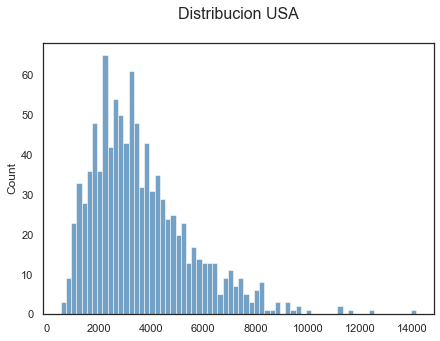

In [26]:
distribution_plotter(sales_usa,'USA')

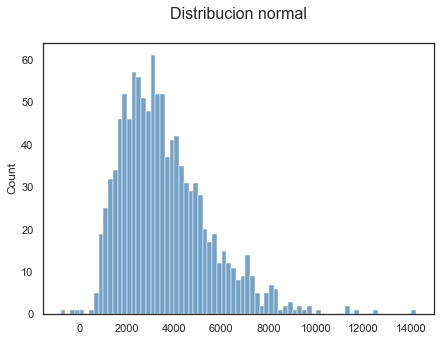

In [31]:
distribution_plotter(normal_and_original,'normal')

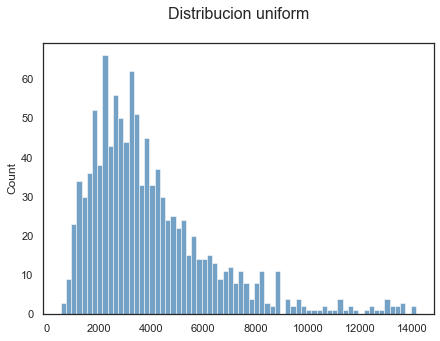

In [32]:
distribution_plotter(uniform_and_original,'uniform')